<a href="https://colab.research.google.com/github/AkashBaidya/DataScience/blob/main/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

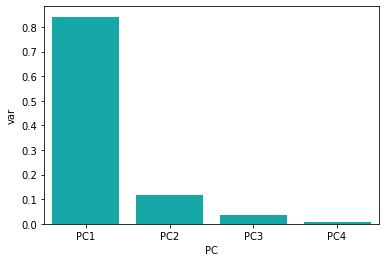

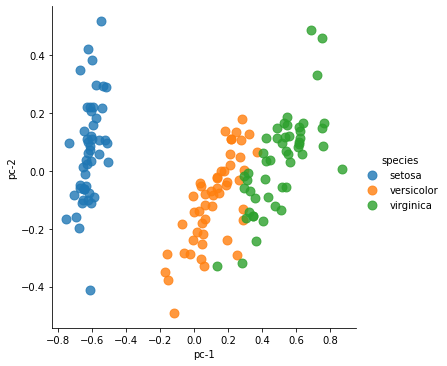

In [8]:

#dataset load
import pandas as pd
url='https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-iris.csv'
df=pd.read_csv(url)
df.head()

#feature and target variable setting
features=['sepal_length','sepal_width','petal_length','petal_width']
x=df[features]
y=df.species
#scalized
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(x)
scaled=pd.DataFrame(scaler.transform(x),columns=x.columns)
scaled.head()

#selection of variables
from sklearn.decomposition import PCA


pca=PCA(n_components=4)

principalComponents=pca.fit_transform(scaled)
principalDf=pd.DataFrame(data=principalComponents,columns=['pc-1','pc-2','pc-3','pc-4'])
principalDf

#final dataset
finalDf=pd.concat([principalDf,df[['species']]],axis=1)
finalDf.head()
#ratio
pca.explained_variance_ratio_

#plotting

import seaborn as sns

dfexp=pd.DataFrame({'var':pca.explained_variance_ratio_,'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="var", data=dfexp,color="c")



import matplotlib.pyplot as plt
sns.lmplot(x="pc-1",y="pc-2",data=finalDf,fit_reg=False, hue='species',legend=True, scatter_kws={"s":80})